# **Assignment 1: Zipf Law, Stemming, Lemmatization**

### **Task : 1** - Download any document collection from [20 Newsgroups dataset](http://qwone.com/~jason/20Newsgroups/)

I have created a randomizer that will fetch the data of a random category from the 20 categories of the **original 20 Newsgroups dataset**

In [1]:
import random
from sklearn.datasets import fetch_20newsgroups


In [2]:
def list_all_categories():
  newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
  categories = list(newsgroups_data.target_names)
  print("List of Categories: ")
  print(list(newsgroups_data.target_names))
  print()
  return categories

In [3]:
def choose_a_category(categories):
  category = random.choice(categories)
  print("Selected category: " + category)
  return category

In [4]:
def fetching_a_collection():
  categories = list_all_categories()
  category = choose_a_category(categories)
  selected_category = []
  selected_category.append(category)
  newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), categories=selected_category)
  return newsgroups_data


In [5]:
fetched_data = fetching_a_collection()

List of Categories: 
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

Selected category: talk.religion.misc




---



### **Task : 2** - Collect the word statistics and check whether there exists a Zipf's Law there or not.

**Zipf's law** states that the frequency of a given word is dependent on the inverse of it's rank, i.e. the word with the second highest rank will have the frequency value ½ of the first word, the word with the third highest rank will have the frequency value ⅓ of the first word, and so on...

*   **Frequency** - Number of occurences of a word in the given document or corpus.
*   **Rank** - Position occupied by a word for having the highest number of occurence in the given document or corpus. (Highest freq = Hignest rank)

In [6]:
from operator import itemgetter
import nltk
import re
import nltk.corpus
import pandas as pd
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
df = pd.DataFrame()
df['text'] = fetched_data.data

In [8]:
df['text']

0      \nZoroaster is far older than Daniel. If anyth...
1      \n\nWell, the best thing to do is to read the ...
2      930425 \n\n\nRome was under attack by barbaria...
3      \n\n\tIf given a definite definition of "God",...
4         Surely you are not equating David Koresh wi...
                             ...                        
623    \n\tPlease do! And if you don't want to post i...
624    \n\n\n\n\n\nI would really appreciate if when ...
625    I will instruct thee and teach thee\n\tin the ...
626    On 21-Apr-93 in Re: ABORTION and private he..\...
627    ...\n\n\tYou can tell, folks, when the man has...
Name: text, Length: 628, dtype: object

In [9]:
def textclean(text):
    cleaner = re.sub(r"[^a-zA-Z ]+", ' ', text.lower())   # Lowercase and strip everything except words
    cleaner = word_tokenize(cleaner)      # Tokenize
    cleaner = [word.lower() for word in cleaner if word.isalpha()]
    cleaner = [word for word in cleaner if len(word)>=2]
    return cleaner

In [10]:
stop_words = stopwords.words('english')

def textclean_stopwords(text):
    cleaner = re.sub(r"[^a-zA-Z ]+", ' ', text.lower())
    cleaner = word_tokenize(cleaner)
    cleaner = [word.lower() for word in cleaner if word.isalpha()]
    cleaner = [word for word in cleaner if len(word)>=2]
    cleaner = [word for word in cleaner if word not in stop_words]
    return cleaner

In [11]:
df['clean_text'] = df.text.apply(lambda x: textclean(x))
df['clean_text_stopwords'] = df.text.apply(lambda x: textclean_stopwords(x))

In [12]:
list_of_words1 = []
for arr in df['clean_text']:
  list_of_words1 += arr

In [13]:
list_of_words2 = []
for arr in df['clean_text_stopwords']:
  list_of_words2 += arr

In [14]:
len(list_of_words1)

132899

In [15]:
len(list_of_words2)

67912

In [16]:
def calculating_frequency(list_of_words):
  for word in list_of_words :
    count = frequency.get(word , 0)
    frequency[word] = count + 1

In [17]:
frequency = {}

# We can also calculate for the data obtained after removing stopwords by altering the list of words
calculating_frequency(list_of_words1)  

rank = 1
column_header = ['Rank', 'Frequency', 'Frequency * Rank']
df_freq = pd.DataFrame( columns = column_header )
collection = sorted(frequency.items(), key=itemgetter(1), reverse = True)


In [18]:
# Table for frequency * rank

for word , freq in collection:
    df_freq.loc[word] = [rank, freq, rank*freq]
    rank = rank + 1

print (df_freq)


                Rank Frequency Frequency * Rank
the                1      7899             7899
of                 2      4213             8426
to                 3      3857            11571
and                4      3286            13144
that               5      2862            14310
...              ...       ...              ...
factory        11529         1            11529
unpredictably  11530         1            11530
analyst        11531         1            11531
cannnot        11532         1            11532
pumped         11533         1            11533

[11533 rows x 3 columns]


In [19]:
print(df_freq[:50])

       Rank Frequency Frequency * Rank
the       1      7899             7899
of        2      4213             8426
to        3      3857            11571
and       4      3286            13144
that      5      2862            14310
is        6      2611            15666
in        7      2279            15953
you       8      1742            13936
it        9      1606            14454
not      10      1353            13530
are      11      1058            11638
for      12      1045            12540
this     13      1045            13585
as       14      1021            14294
be       15       953            14295
have     16       939            15024
with     17       832            14144
he       18       778            14004
they     19       742            14098
was      20       738            14760
on       21       726            15246
or       22       696            15312
but      23       693            15939
by       24       659            15816
god      25       635    

We can see that the are values from somewhere in the middle, "Frequency * Rank"  for most of the values are nearly similar. So the laws do hold true for words.

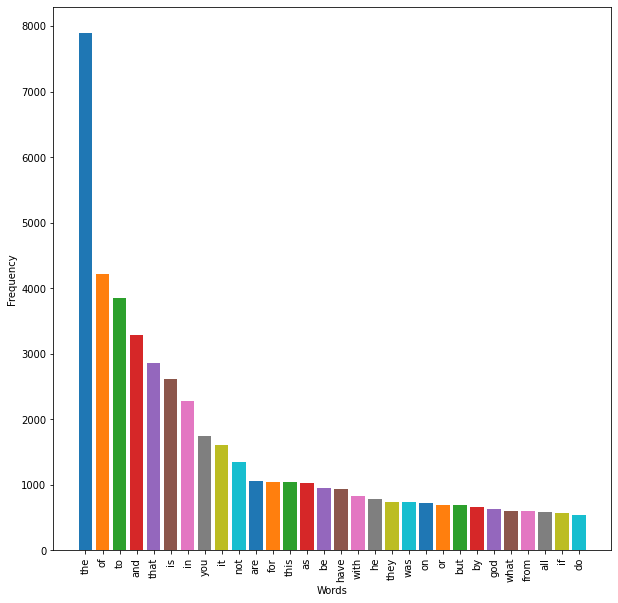

In [20]:
# Visualization
plt.figure(figsize=(10,10)) 
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)   

for word , freq in collection[:30]:
    plt.bar(word, freq)    
plt.show()




---



### **Task : 3** - Download / implement Porter's stemmer and any other stemmer / lemmatizer of your choice and compare the number of unique words.


**Stemming** is the process of producing morphological variants of a root/base word. Stems are created by removing the suffixes or prefixes used with a word.

**Porter Stemmer** uses Suffix Stripping to produce stems.
Porter Stemmer algorithm does not follow linguistics rather a set of 05 rules for different cases that are applied in phases (step by step) to generate stems

In [21]:
from nltk.stem import PorterStemmer
  
ps = PorterStemmer()

stemmed_words = []

for word in list_of_words1:
  stemmed_words.append(ps.stem(word))

unique_stem_words = len(set(stemmed_words))

In [22]:
unique_stem_words

8015

**Lemmatization** is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. 


In [23]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

lemmatized_words = []

for word in list_of_words1:
  lemmatized_words.append(lemmatizer.lemmatize(word))

unique_lemma_words = len(set(lemmatized_words))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
unique_lemma_words

10357

### **Comparision**

*   Number of unique words after lemmatization is more than the one's obtained after stemming with Porter's stemmer.
*  Stemming just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form 
*   Lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.


